<a href="https://colab.research.google.com/github/otavioaugusto1/deep-learning/blob/main/Deep_learning_introdu%C3%A7%C3%A3o_ao_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E-commerce de loja de roupas

## Toda vez que subimos uma peça de roupa para o site, teremos que informar se ela é uma bolsa, saia, camisa, bota e etc. Teremos que automatizar esse processo e fazer com que a máquina já nos informe qual peça de roupa é.

Imports

In [10]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

Carregando o dataset

In [11]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

Exploração dos dados

In [12]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

Exibição dos dados

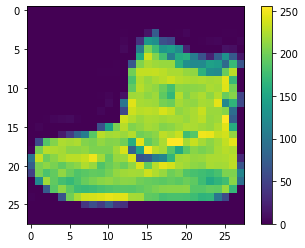

In [13]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

Normalização das imagens

In [14]:
imagens_treino = imagens_treino/float(255)

No deep learning: entrada, processamento e saída fazem parte de um todo. Na camada 0, a entrada recebe a imagem que é 28 pixels por 28 pixels, alinha ela e transforma em uma linha por 28 colunas.

Criando, compilando, treinando e normalizando o modelo

In [15]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5310 - accuracy: 0.8125 - val_loss: 0.4127 - val_accuracy: 0.8502
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4002 - accuracy: 0.8545 - val_loss: 0.3663 - val_accuracy: 0.8702
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3645 - accuracy: 0.8673 - val_loss: 0.3556 - val_accuracy: 0.8718
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3412 - accuracy: 0.8739 - val_loss: 0.3447 - val_accuracy: 0.8773
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3246 - accuracy: 0.8794 - val_loss: 0.3270 - val_accuracy: 0.8780


Salvando e carregando o modelo treinado

In [16]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')


Visualizando as acurácias de treino e validação por época

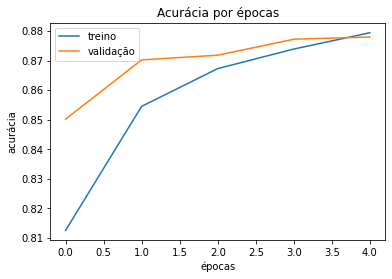

In [17]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

## Posso experimentar colocar mais camadas para diminuir a perda mesmo sem saber se isso aumentará ou diminuirá. Farei o teste:

Visualizando as perdas de treino e validação por época



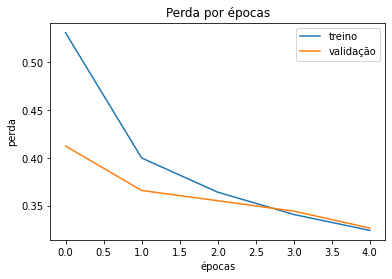

In [18]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o modelo e o modelo salvo

In [19]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste: 2
número da imagem de teste: 2
resultado teste modelo salvo: 2
número da imagem de teste: 2


Avaliando o modelo

In [20]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 47.0417 - accuracy: 0.8667
Perda do teste: 47.041690826416016
Acurácia do teste: 0.8666999936103821
